In [2]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate, SystemMessagePromptTemplate,ChatPromptTemplate, HumanMessagePromptTemplate
from langchain.agents import load_tools,initialize_agent,AgentType,create_react_agent,AgentExecutor
f = open('../api_key.txt')
api_key = f.read()
llm = ChatOpenAI(openai_api_key=api_key,temperature=0) #Recomendable temperatura a 0 para que el LLM no sea muy creativo, vamos a tener muchas herramientas a nuestra disposición y queremos que sea más determinista

In [4]:
from langchain_experimental.agents.agent_toolkits import create_python_agent
from langchain_experimental.tools.python.tool import PythonREPLTool

In [5]:
agent = create_python_agent(tool=PythonREPLTool(),
                           llm=llm,
                           agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION)

In [6]:
lista_ejemplo = [3,1,5,3,5,6,7,3,5,10]

In [8]:
agent.invoke(f'''ordena la lista {lista_ejemplo}''')

{'input': 'ordena la lista [3, 1, 5, 3, 5, 6, 7, 3, 5, 10]',
 'output': '[1, 3, 3, 3, 5, 5, 5, 6, 7, 10]'}

In [9]:
import pandas as pd

In [10]:
df = pd.read_excel('datos_ventas_small.xlsx')

In [11]:
df.head()

,ID,Cantidad,Precio unitario,Venta total,Fecha compra,Estado,Línea Producto,Código Producto,Nombre cliente,Ciudad,País,Territorio,Tamaño pedido
0,10145,45,83.26,3746.70,2023-08-25,Shipped,Motorcycles,S10_1678,"Toys4GrownUps,com",Pasadena,USA,NaN,Medium
1,10159,0,100.00,0.00,2023-10-10,Shipped,Motorcycles,S10_1678,"Corporate Gift Ideas Co,",San Francisco,USA,NaN,Medium
2,10168,36,96.66,3479.76,2023-10-28,Shipped,Motorcycles,S10_1678,"Technics Stores Inc,",Burlingame,USA,NaN,Medium
3,10180,29,86.13,2497.77,2023-11-11,Shipped,Motorcycles,S10_1678,Daedalus Designs Imports,Lille,France,EMEA,Small
4,10188,48,100.00,5512.32,2023-11-18,Shipped,Motorcycles,S10_1678,Herkku Gifts,Bergen,Norway,EMEA,Medium


In [12]:
agent.invoke(f'''¿Qué sentencias de código tendría que ejecutar para obtener la suma de venta total agregada por Línea de Producto? Este sería el dataframe {df}, no tienes que ejecutar la sentencia, solo pasarme el código a ejecutar''')

{'input': "¿Qué sentencias de código tendría que ejecutar para obtener la suma de venta total agregada por Línea de Producto? Este sería el dataframe        ID  Cantidad  Precio unitario  Venta total Fecha compra   Estado  \\\n0   10145        45            83.26      3746.70   2023-08-25  Shipped   \n1   10159         0           100.00         0.00   2023-10-10  Shipped   \n2   10168        36            96.66      3479.76   2023-10-28  Shipped   \n3   10180        29            86.13      2497.77   2023-11-11  Shipped   \n4   10188        48           100.00      5512.32   2023-11-18  Shipped   \n5   10201        22            98.57      2168.54   2023-01-12   Shippe   \n6   10237        23           100.00      2333.12   2024-05-04  Shipped   \n7   10251        28           100.00      3188.64   2023-01-12  Shipped   \n8   10375        42            34.91      1466.22   2024-03-02  Shipped   \n9   10388        84            76.36      6414.24   2024-03-03  Shipped   \n10  10403    

In [13]:
df.groupby('Línea Producto')['Venta total'].sum()

Línea Producto
Classic Cars    55006.84
Motorcycles     49017.86
Name: Venta total, dtype: float64

In [14]:
agent.invoke(f'''¿Cuál es la suma agregada de la venta total para la línea de proudcto "Motorcycles"? Este sería el dataframe {df}''')

{'input': '¿Cuál es la suma agregada de la venta total para la línea de proudcto "Motorcycles"? Este sería el dataframe        ID  Cantidad  Precio unitario  Venta total Fecha compra   Estado  \\\n0   10145        45            83.26      3746.70   2023-08-25  Shipped   \n1   10159         0           100.00         0.00   2023-10-10  Shipped   \n2   10168        36            96.66      3479.76   2023-10-28  Shipped   \n3   10180        29            86.13      2497.77   2023-11-11  Shipped   \n4   10188        48           100.00      5512.32   2023-11-18  Shipped   \n5   10201        22            98.57      2168.54   2023-01-12   Shippe   \n6   10237        23           100.00      2333.12   2024-05-04  Shipped   \n7   10251        28           100.00      3188.64   2023-01-12  Shipped   \n8   10375        42            34.91      1466.22   2024-03-02  Shipped   \n9   10388        84            76.36      6414.24   2024-03-03  Shipped   \n10  10403        48           100.00      4

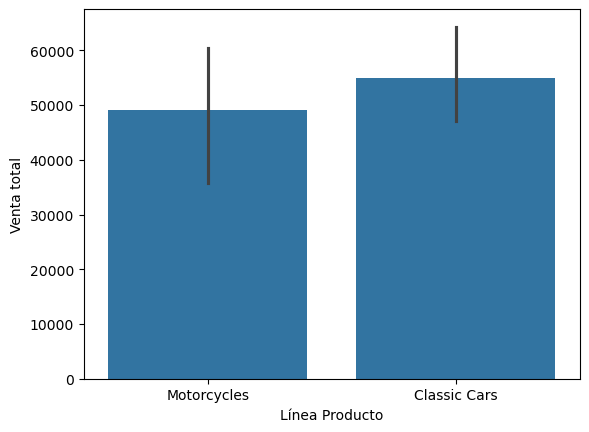

{'input': "¿Qué sentencias de código tendría que ejecutar para tener una visualización con la librería Seaborn que agregue a nivel de Línea de Producto el total de venta? Este sería el dataframe        ID  Cantidad  Precio unitario  Venta total Fecha compra   Estado  \\\n0   10145        45            83.26      3746.70   2023-08-25  Shipped   \n1   10159         0           100.00         0.00   2023-10-10  Shipped   \n2   10168        36            96.66      3479.76   2023-10-28  Shipped   \n3   10180        29            86.13      2497.77   2023-11-11  Shipped   \n4   10188        48           100.00      5512.32   2023-11-18  Shipped   \n5   10201        22            98.57      2168.54   2023-01-12   Shippe   \n6   10237        23           100.00      2333.12   2024-05-04  Shipped   \n7   10251        28           100.00      3188.64   2023-01-12  Shipped   \n8   10375        42            34.91      1466.22   2024-03-02  Shipped   \n9   10388        84            76.36      64

In [15]:
agent.invoke(f'''¿Qué sentencias de código tendría que ejecutar para tener una visualización con la librería Seaborn que agregue a nivel de Línea de Producto el total de venta? Este sería el dataframe {df}, recuerda que no tienes que ejecutar la sentencia, solo pasarme el código a ejecutar''')

<Axes: xlabel='Línea Producto', ylabel='Venta total'>

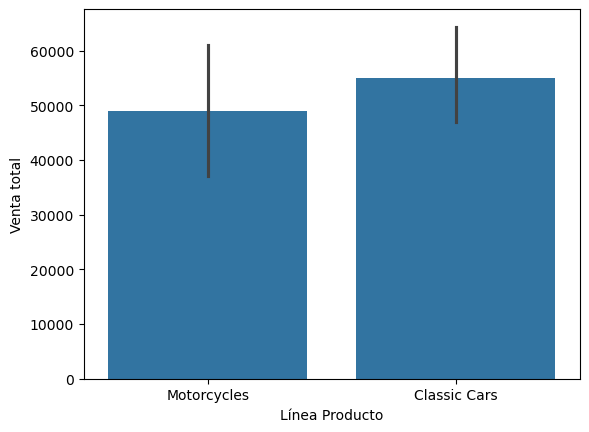

In [16]:
import seaborn as sns
sns.barplot(x='Línea Producto', y='Venta total', data=df, estimator=sum)